In [205]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import numba
from numba import jit
from scipy.linalg import eigh_tridiagonal
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

The Schrodinger's Equation is given by
$$ i\hbar \frac{\partial \psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \psi(x,t)}{\partial x^2} + V(x)\psi(x,t)$$

In [206]:
Nx = 301
Nt = 100000
dx = 1/(Nx-1)
dt=1e-7
x = np.linspace(-1, 1, Nx)
psi0 = np.sqrt(2)*np.sin(np.pi*x)
mu, sigma = 1/2, 1/20
mu, sigma = 0, 1/20
V = -1e4*np.exp(-(x-mu)**2/(2*sigma**2))
V = np.zeros(Nx)

Text(0, 0.5, '$V(x)$')

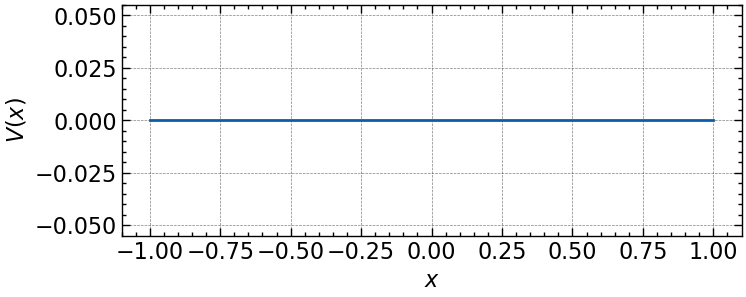

In [207]:
plt.figure(figsize=(8,3))
plt.plot(x,V)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')

In [208]:
psi = np.zeros([Nt,Nx]).astype(complex)
psi[0] = psi0

In [209]:
@numba.njit
def compute_psi(psi):
    for t in range(0, Nt-1):
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t][i] + 1j/2 * dt/dx**2 * (psi[t][i+1] - 2*psi[t][i] + psi[t][i-1]) - 1j*dt*V[i]*psi[t][i]
        
        normal = np.sum(np.absolute(psi[t+1])**2)*dx
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t+1][i]/normal
        
    return psi

In [210]:
psi_m1 = compute_psi(psi)

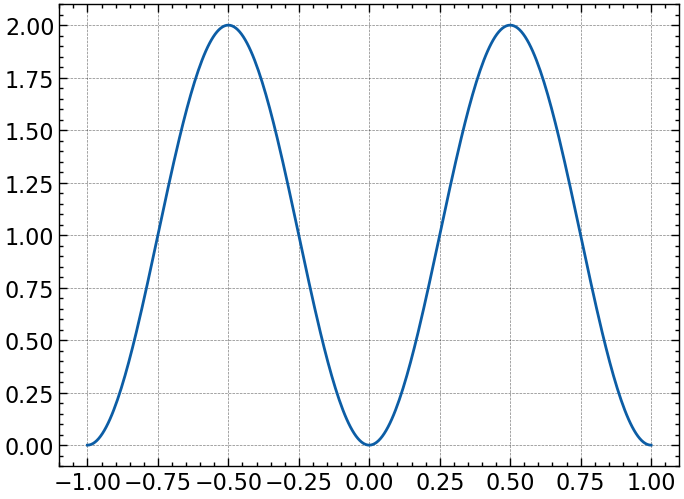

In [216]:
plt.plot(x, np.absolute(psi_m1[10000])**2)

In [212]:
# def animate(i):
#     ln1.set_data(x, np.absolute(psi_m1[100*i])**2)
#     time_text.set_text('$(10^4 mL^2)^{-1}t=$'+'{:.1f}'.format(100*i*dt*1e4))
    
# fig, ax = plt.subplots(1,1, figsize=(12,10))
# #ax.grid()
# ln1, = plt.plot([], [], 'r-', lw=2, markersize=8, label='Method 1')
# time_text = ax.text(0.65, 16, '', fontsize=15,
#            bbox=dict(facecolor='white', edgecolor='black'))
# ax.set_ylim(-1, 20)
# ax.set_xlim(-1,1)
# ax.set_ylabel('$|\psi(x)|^2$', fontsize=20)
# ax.set_xlabel('$x/L$', fontsize=20)
# ax.legend(loc='upper left')
# ax.set_title('$(mL^2)V(x) = -10^4 \cdot n(x, \mu=L/2, \sigma=L/20)$')
# plt.tight_layout()
# ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
# ani.save('pen2.gif',writer='pillow',fps=50,dpi=100)